In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import datetime as dt

In [5]:
plt.rcParams['font.family'] = "MS Gothic"

In [2]:
here = Path().resolve()
DATA_DIR = here.parent/'data'

In [3]:
csv_df = pd.read_csv(DATA_DIR/'cape.csv', dtype={'Date': str})

#不要列の削除
del csv_df['Unnamed: 13']
del csv_df['Unnamed: 15']

In [102]:
csv_df.columns

Index(['Date', 'P', 'D', 'E', 'CPI', 'Fraction', 'Rate GS10', 'Price',
       'Dividend', ' Price ', 'Earnings', ' Earnings ', 'CAPE', 'TR CAPE',
       'Yield', 'Returns', 'Returns.1', 'Real Return', 'Real Return.1',
       'Returns.2'],
      dtype='object')

In [4]:
csv_df.dtypes

Date              object
P                float64
D                float64
E                float64
CPI              float64
Fraction         float64
Rate GS10        float64
Price            float64
Dividend         float64
 Price           float64
Earnings         float64
 Earnings        float64
CAPE             float64
TR CAPE          float64
Yield            float64
Returns          float64
Returns.1        float64
Real Return      float64
Real Return.1    float64
Returns.2        float64
dtype: object

In [107]:
rename_dict = {
    'Date': '年月',
    'P': '価格',
    'D': '配当',
    'E': '利益',
    'CPI': '物価',
    'Fraction': '年月_num',
    'Rate GS10': '10年債金利',
    'Price': '物価調整後価格',
    'Dividend': '物価調整後配当',
    ' Price ': '物価調整後TR',
    'Earnings': '物価調整後利益',
    'CAPE': 'CAPE',
    'TR CAPE': 'TR_CAPE',
    'Yield': '超過CAPE',
    'Returns': '月次債権利回り',
    'Returns.1': '月次物価調整後利回り?',
    'Real Return': '株10年平均利回り',
    'Real Return.1': '債権10年平均利回り',
    'Returns.2': '超過10年平均利回り',
}
data_df = csv_df.rename(columns = rename_dict)

In [108]:
data_df['年月'] = pd.to_datetime(data_df['年月'], format='%Y.%m')

In [109]:
data_df

,年月,価格,配当,利益,物価,年月_num,10年債金利,物価調整後価格,物価調整後配当,物価調整後TR,物価調整後利益,Earnings,CAPE,TR_CAPE,超過CAPE,月次債権利回り,月次物価調整後利回り?,株10年平均利回り,債権10年平均利回り,超過10年平均利回り
0,1871-01-01,4.440000,0.260000,0.4,12.464061,1871.041667,5.320000,103.427910,6.056589,1.034279e+02,9.317830,9.317830,NaN,NaN,NaN,1.004177,1.000000,0.130609,0.092504,0.038106
1,1871-02-01,4.500000,0.260000,0.4,12.844641,1871.125000,5.323333,101.719656,5.877136,1.022094e+02,9.041747,9.085282,NaN,NaN,NaN,1.004180,0.974424,0.130858,0.094635,0.036224
2,1871-03-01,4.610000,0.260000,0.4,13.034972,1871.208333,5.326667,102.684567,5.791321,1.036639e+02,8.909724,8.994699,NaN,NaN,NaN,1.004183,0.964209,0.130951,0.096186,0.034765
3,1871-04-01,4.740000,0.260000,0.4,12.559226,1871.291667,5.330000,109.579623,6.010697,1.111304e+02,9.247226,9.378092,NaN,NaN,NaN,1.004185,1.004919,0.122056,0.090972,0.031084
4,1871-05-01,4.860000,0.260000,0.4,12.273812,1871.375000,5.333333,114.966463,6.150469,1.171133e+02,9.462260,9.638951,NaN,NaN,NaN,1.004188,1.032591,0.122638,0.089488,0.033150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,2022-01-01,4573.815500,60.921403,NaN,281.148000,2022.041667,1.760000,4723.435562,62.914283,3.027482e+06,NaN,NaN,36.936758,40.194255,0.031248,0.986135,49.864401,NaN,NaN,NaN
1813,2022-02-01,4435.980526,61.445689,NaN,283.716000,2022.125000,1.930000,4539.626831,62.881362,2.913029e+06,NaN,NaN,35.462522,38.605796,0.031154,0.983744,48.727932,NaN,NaN,NaN
1814,2022-03-01,4391.265217,61.969974,NaN,287.504000,2022.208333,2.130000,4434.657951,62.582337,2.849018e+06,NaN,NaN,34.606400,37.690000,0.030434,0.948016,47.304227,NaN,NaN,NaN
1815,2022-04-01,4391.296000,NaN,NaN,289.398000,2022.291667,2.750000,4405.665682,NaN,2.830392e+06,NaN,NaN,34.343324,37.375683,0.024818,0.983414,44.551665,NaN,NaN,NaN


In [139]:
for i in range(1, 41):
    if i == 10:
        continue
    f = data_df['物価調整後TR'].shift(-12*i)
    n = data_df['物価調整後TR']
    data_df[f'株{i}年平均利回り']= (f/n)**(1/i)-1

In [140]:
data_df.tail()

,年月,価格,配当,利益,物価,年月_num,10年債金利,物価調整後価格,物価調整後配当,物価調整後TR,...,株31年平均利回り,株32年平均利回り,株33年平均利回り,株34年平均利回り,株35年平均利回り,株36年平均利回り,株37年平均利回り,株38年平均利回り,株39年平均利回り,株40年平均利回り
1812,2022-01-01,4573.815500,60.921403,NaN,281.148,2022.041667,1.76,4723.435562,62.914283,3.027482e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1813,2022-02-01,4435.980526,61.445689,NaN,283.716,2022.125000,1.93,4539.626831,62.881362,2.913029e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1814,2022-03-01,4391.265217,61.969974,NaN,287.504,2022.208333,2.13,4434.657951,62.582337,2.849018e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1815,2022-04-01,4391.296000,NaN,NaN,289.398,2022.291667,2.75,4405.665682,NaN,2.830392e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816,2022-05-01,4175.480000,NaN,NaN,290.345,2022.375000,2.97,4175.480000,NaN,2.682510e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
data_df.describe()['超過CAPE']

count    1697.000000
mean        0.046706
std         0.044180
min        -0.025777
25%         0.015868
50%         0.034669
75%         0.066709
max         0.235340
Name: 超過CAPE, dtype: float64

0.007460396410224002 0.015809072349193487 0.11029636085237904


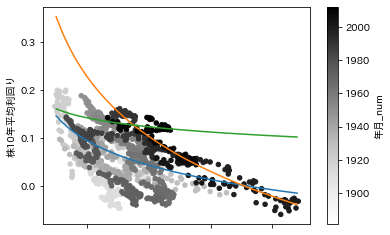

In [63]:
ax = data_df.plot.scatter(x='CAPE', y='株10年平均利回り', c='年月_num', cmap='Greys')
X = np.arange(5, 45, 1)
def f1(x):
    return -0.074*np.log(x) + 0.2651
def f2(x):
    return -0.18*np.log(x) + 0.6425
def f3(x):
    return -0.027*np.log(x) + 0.2043
ax.plot(X, f1(X))
ax.plot(X, f2(X))
ax.plot(X, f3(X))
print(f1(32.512228), f2(32.512228), f3(32.512228))

1800-01-01: 0.66x+0.0345 0.0509463167706008
1960-01-01: 1.22x+0.0166 0.04671991926222788
2000-01-01: 2.43x+0.0009 0.06107543363017813
2009-01-01: 0.76x+0.0868 0.10555525801826296


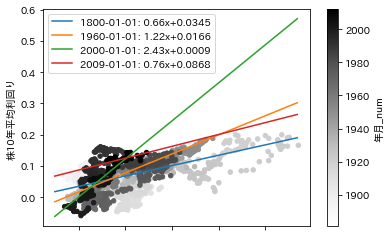

In [95]:
ax = data_df.plot.scatter(x='超過CAPE', y='株10年平均利回り', c='年月_num', cmap='Greys')
terms = ['1800-01-01','1960-01-01', '2000-01-01', '2009-01-01']
for t in terms:
    _f = data_df.eval('年月 >= @t and 超過CAPE == 超過CAPE and 株10年平均利回り==株10年平均利回り')
    y = data_df.loc[_f, '株10年平均利回り'].values
    x = data_df.loc[_f, ['超過CAPE']].values
    model_lr = LinearRegression()
    model_lr.fit(x, y)
    a = model_lr.coef_
    b = model_lr.intercept_
    X = np.arange(-0.025777,  0.235340, 0.01)
    label = f'{t}: {a[0]:.2f}x{"+" if b>0 else ""}{b:.4f}'
    ax.plot(X, a*X+b, label=label)
    print(label, a[0]*0.024713+b)
plt.legend()
plt.show()

<AxesSubplot:xlabel='年月'>

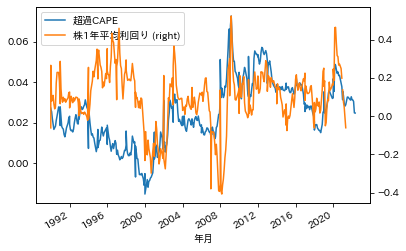

In [179]:
c = '株1年平均利回り'
data_df.query('年月 >= "1990-01-01"').set_index('年月')[['超過CAPE', c]].plot(secondary_y=c)

<AxesSubplot:xlabel='年月'>

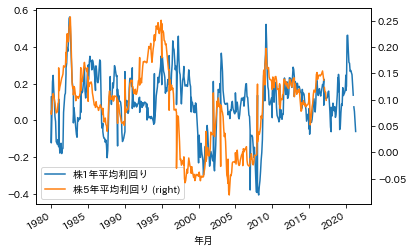

In [173]:
c1 = '株1年平均利回り'
c2 = '株5年平均利回り'
data_df.query('年月 >= "1980-01-01"').set_index('年月')[[c1, c2]].plot(secondary_y=c2)

<AxesSubplot:xlabel='超過CAPE', ylabel='株1年平均利回り'>

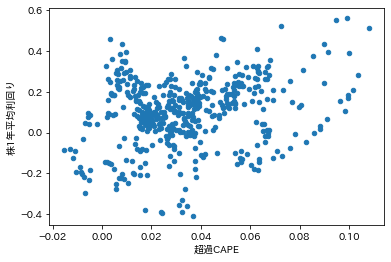

In [182]:
c1 = '超過CAPE'
c2 = '株1年平均利回り'
data_df.query('年月 >= "1980-01-01"').plot.scatter(x=c1, y=c2)

1800: 0.99x+0.0377 0.062185268709457744
1960: 1.14x+0.0385 0.06661492320330295
2000: 6.42x-0.1254 0.03336757357452999
2009: 5.65x-0.0803 0.059266120904949954


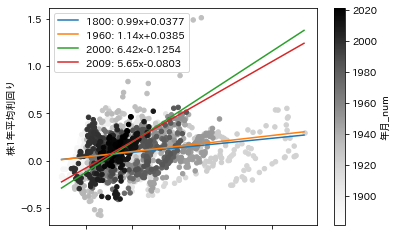

In [181]:
c = '株1年平均利回り'
ax = data_df.plot.scatter(x='超過CAPE', y=c, c='年月_num', cmap='Greys')
terms = [1800, 1960, 2000, 2009]
for t in terms:
    #data_df.query('年月 >= @t').plot.scatter(x='超過CAPE', y=c, c='年月_num', cmap='Greys')
    _f = data_df.eval(f'年月 >= "{t}-01-01" and 超過CAPE == 超過CAPE and {c}=={c}')
    y = data_df.loc[_f, c].values
    x = data_df.loc[_f, ['超過CAPE']].values
    model_lr = LinearRegression()
    model_lr.fit(x, y)
    a = model_lr.coef_
    b = model_lr.intercept_
    X = np.arange(-0.025777,  0.235340, 0.01)
    label = f'{t}: {a[0]:.2f}x{"+" if b>0 else ""}{b:.4f}'
    ax.plot(X, a*X+b, label=label)
    print(label, a[0]*0.024713+b)
plt.legend()
plt.show()

<AxesSubplot:xlabel='超過CAPE', ylabel='株1年平均利回り'>

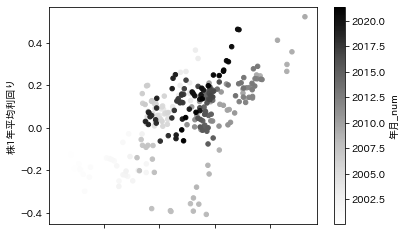

In [184]:
data_df.query('年月 >= "2000-01-01"').plot.scatter(x='超過CAPE', y='株1年平均利回り', c='年月_num', cmap='Greys')

In [59]:
_f = data_df.eval('年月 >= "2009-01-01" and CAPE == CAPE and 株10年平均利回り==株10年平均利回り')#~data_df[['CAPE', '株10年平均利回り']].isna().any(axis=1)

In [189]:
data_df['超過CAPE']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1812    0.031248
1813    0.031154
1814    0.030434
1815    0.024818
1816    0.024713
Name: 超過CAPE, Length: 1817, dtype: float64

<AxesSubplot:xlabel='超過CAPE', ylabel='株1年平均利回り'>

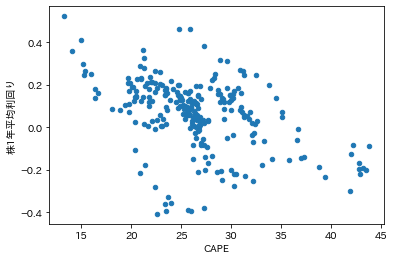

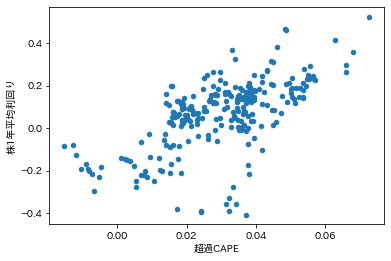

In [188]:
c = '株1年平均利回り'
data_df.query('年月 >= "2000-01-01"').plot.scatter(x='CAPE', y=c)
data_df.query('年月 >= "2000-01-01"').plot.scatter(x='超過CAPE', y=c)

In [60]:
y = data_df.loc[_f, '株10年平均利回り'].values
x = np.log(data_df.loc[_f, ['CAPE']].values)

In [61]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(x, y)
print(model_lr.coef_)
print(model_lr.intercept_)

[-0.02771833]
0.2043419868519711


In [39]:
model_lr.

LinearRegression()

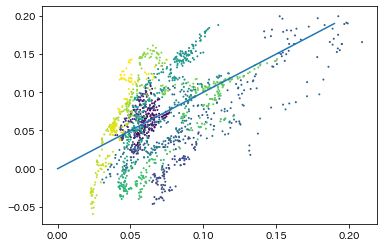

In [73]:
plt.scatter(1/data_df['CAPE'], data_df['株10年平均利回り'], s=1, c=data_df['年月_num'])
x = np.arange(0, 0.2, 0.01)
plt.plot(x, x)